# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Curtis
[nltk_data]     lym\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\Users\Curtis
[nltk_data]     lym\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Curtis
[nltk_data]     lym\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('api.env')
api_key = os.getenv("news_api")

In [11]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [12]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)
#this allows me to see the amount of articles relating to Bitcoin
print(f"Totla bitcoin articles: {bitcoin_news['totalResults']}")
bitcoin_news['articles'][0]

Totla bitcoin articles: 9000


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [13]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
#this allows me to see the amount of articles relating to Ethereum
ethereum_news['totalResults']

3170

In [14]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        #will give polarity scores of content in text
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        #stores it in dictionary
        bitcoin_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    #if there is a error go to the next line in the loop 
    except AttributeError:
        pass
#creating dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

#Reorder DataFrame columns
#cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
#bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000


In [15]:
bitcoin_df['text']

0     A similar hoax earlier this year tied Walmart ...
1     Theres a big new presence slurping up power fr...
2     For all the talk of democratizing finance, the...
3     In keeping with a previous announcement, AMC t...
4     Representation of cryptocurrency Bitcoin is pl...
5     A representation of the virtual cryptocurrency...
6     A representation of the virtual cryptocurrency...
7     Posted \r\nBitcoin climbed to a record high on...
8     A representation of the virtual cryptocurrency...
9     By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...
10    STR/NurPhoto via Getty Images\r\nThe first-eve...
11    Bitcoin artwork displayed at the Bitcoin 2021 ...
12    * Cryotocurrency gets boost from ETF bitcoin f...
13    Ether.\r\nNurPhoto\r\n<ul><li>The approval of ...
14    Bitcoin seen on display.\r\nRafael Henrique/SO...
15    Bitcoin was trading over 7% higher on Monday m...
16    A passenger (R) talks to an airline employee o...
17    * Bitcoin breaks past $68,000; Ether nears

In [16]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for e_article in ethereum_news['articles']:
    try:
        text = e_article['content']
        date = e_article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    #
    except AttributeError:
        pass
#creating dataframe
ethereum_df = pd.DataFrame(ethereum_sentiments)

#Reorder DataFrame columns
#e_cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
#ethereum_df = ethereum_df[e_cols]

ethereum_df.tail()

,text,date,compound,positive,negative,neutral
15,The worlds second most valuable cryptocurrency...,2021-10-25,0.6478,0.150,0.000,0.850
16,Ive always been vexed by the question of how t...,2021-10-12,0.6705,0.146,0.048,0.806
17,"NEW YORK, Nov 8 (Reuters) - Inflows into bitco...",2021-11-08,0.3612,0.072,0.000,0.928
18,The process started Thursday at 6:13 p.m. New ...,2021-10-30,0.0000,0.000,0.000,1.000
19,Now available as an NFT.\r\nLionsgate/Miramax\...,2021-11-02,0.0000,0.000,0.000,1.000


In [17]:
eth_token_ex = ethereum_df['text']
eth_token_ex

0     A new cross-chain bridge is currently connecte...
1     Mark Cuban has some advice for people who are ...
2     In keeping with a previous announcement, AMC t...
3     Ethereum and bitcoin are the two biggest crypt...
4     Elon Musk\r\npicture alliance / Getty Images\r...
5     Cryptocurrency and business continuity line im...
6     Apple CEO Tim Cook said he owns cryptocurrency...
7     An immersive art installation, which will be c...
8     Coinbase NFT\r\nRobert Nickelsberg/Getty Image...
9     With crypto rewards cards, a small percentage ...
10    Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...
11    Representations of cryptocurrencies Bitcoin, E...
12    Grill burger chain Burger King announced a par...
13    Rahul Rai, co-head of Market Neutral at BlockT...
14    Ether, the second-largest cryptocurrency, soar...
15    The worlds second most valuable cryptocurrency...
16    Ive always been vexed by the question of how t...
17    NEW YORK, Nov 8 (Reuters) - Inflows into b

In [18]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.196380,0.050000,0.003150,0.946850
std,0.290332,0.066988,0.014087,0.065987
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.896500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.481000,0.103500,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [19]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.314000,0.070450,0.002400,0.927150
std,0.312362,0.075296,0.010733,0.078527
min,0.000000,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.888250
50%,0.381550,0.074000,0.000000,0.926000
75%,0.549700,0.110750,0.000000,1.000000
max,0.822500,0.221000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Curtis
[nltk_data]     lym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Curtis
[nltk_data]     lym\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sentence = sent_tokenize(text)
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)
    # Lemmatize words into root words
   
    # Convert the words to lowercase
    tokens_lower = [word.lower() for word in re_words]
    
    # Remove the stop words
    tokens_sw = [word for word in tokens_lower if word not in sw]
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens_sw]
    
    return tokens

In [25]:
eth_token = ethereum_df.text.apply(tokenizer)
bit_token = bitcoin_df.text.apply(tokenizer)

In [26]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['bitcoin_tokens'] = bit_token
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,bitcoin_tokens
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904,"[there, big, new, presence, slurping, power, u..."
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [27]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['ethereum_tokens'] = eth_token
ethereum_df.head()

,text,date,compound,positive,negative,neutral,ethereum_tokens
0,A new cross-chain bridge is currently connecte...,2021-10-16,0.0000,0.000,0.0,1.000,"[new, cross, chain, bridge, currently, connect..."
1,Mark Cuban has some advice for people who are ...,2021-10-14,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
3,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
4,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.0,0.907,"[elon, musk, picture, alliance, getty, image, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [29]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_bigram = ngrams(tokenizer(bitcoin_df.text.str.cat()), 2)
print(bitcoin_bigram)

In [30]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
#ethereum_bigram = ngrams(eth_token, n=2)
ethereum_bigram = ngrams(tokenizer(ethereum_df.text.str.cat()), 2)
print(ethereum_bigram)

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bit_top = token_count(bitcoin_bigram, 10)
#tokens = text
#N = 10 to get the top 10 words
bit_top

[(('reuters', 'bitcoin'), 5),
 (('cryptocurrency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('oct', 'reuters'), 4),
 (('bitcoin', 'seen'), 4),
 (('future', 'based'), 4),
 (('char', 'bitcoin'), 4),
 (('char', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3)]

In [33]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top = token_count(ethereum_bigram, 10)
eth_top

[(('getty', 'image'), 5),
 (('bitcoin', 'ethereum'), 4),
 (('new', 'york'), 3),
 (('rahul', 'rai'), 3),
 (('cross', 'chain'), 2),
 (('chain', 'bridge'), 2),
 (('ethereum', 'bitcoin'), 2),
 (('elon', 'musk'), 2),
 (('york', 'time'), 2),
 (('file', 'photo'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

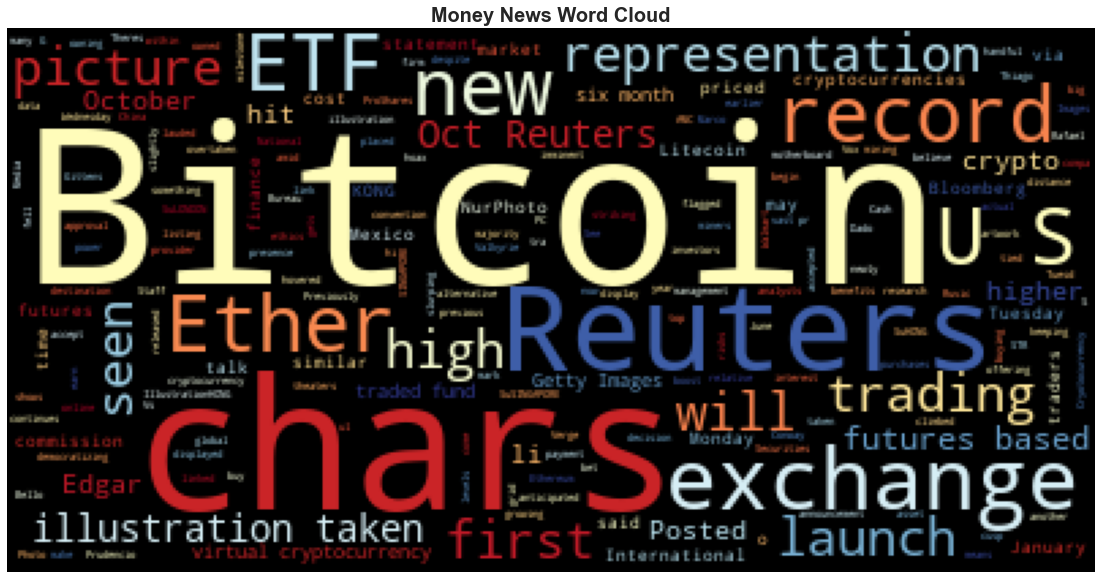

In [36]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wordcloud = WordCloud(colormap="RdYlBu").generate(bitcoin_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

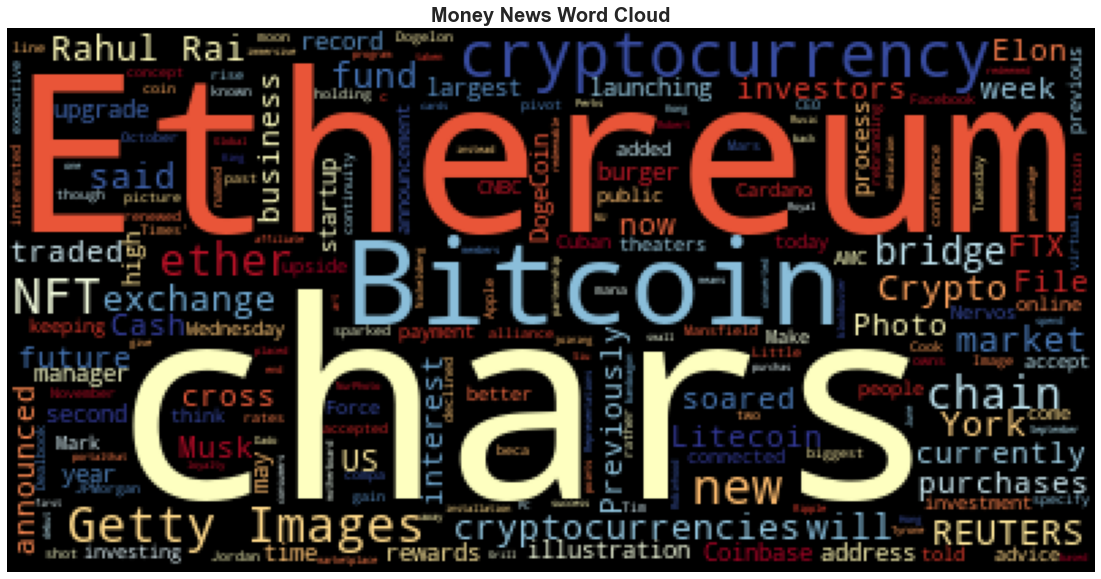

In [37]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

wordcloud = WordCloud(colormap="RdYlBu").generate(ethereum_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm


In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bit_combine = bitcoin_df.text.str.cat()
bit_combine

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ru

In [42]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bit_doc = nlp(bit_combine)
# Add a title to the document
# YOUR CODE HERE!
bit_doc.user_data['title'] = "Bitcoin"

In [43]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bit_doc, style='ent')

In [44]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in bit_doc.ents if ent.label_ == 'GPE'])

['U.S.', 'U.S.', 'China', 'Bloomberg', 'U.S.', 'U.S.', 'Mexico City', 'Mexico', 'U.S.']


---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_combine = bitcoin_df.text.str.cat()
bit_combine

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ru

In [46]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_combine)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = "Ethereum"

In [ ]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [ ]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])

---